In [21]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error

In [22]:
# Run this cell to suppress all DeprecationWarnings
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

In [23]:
yelp = pd.read_csv("yelp142_train.csv")
yelp_test = pd.read_csv("yelp142_test.csv")
yelp.head()

x_train = yelp.drop(columns = {'stars'})
x_test = yelp_test.drop(columns = {'stars'})

temp = pd.get_dummies(yelp, columns=['GoodForKids', 'Alcohol', 'BusinessAcceptsCreditCards', 'WiFi', 'BikeParking', 'ByAppointmentOnly', 'WheelechairAccessible', 'OutdoorSeating', 'RestaurantsReservations', 'DogsAllowed', 'Caters'])
x_train_dummies = temp.iloc[:,1:]
x_test_dummies = pd.get_dummies(yelp_test, columns=['GoodForKids', 'Alcohol', 'BusinessAcceptsCreditCards', 'WiFi', 'BikeParking', 'ByAppointmentOnly', 'WheelechairAccessible', 'OutdoorSeating', 'RestaurantsReservations', 'DogsAllowed', 'Caters']).iloc[:,1:]

y_train = yelp['stars']
y_test = yelp_test['stars']

In [24]:
def OSR2(model, X_test, y_test, y_train):
    
    y_pred = model.predict(pd.DataFrame(X_test))
    SSE = np.sum((y_test - y_pred)**2)
    SST = np.sum((y_test - np.mean(y_train))**2)
                 
    return (1 - SSE/SST)

## Part A. Missing Entries
I think that it is reasonable to treat $(Missing)$ as an explicit category because it is better than assuming the a value to fill it in with. Because all the features with missing data are categorical, it would be even hard to fill it in like we could do with quantitaive data, such as filling with 0 or the average of other data points. By using this method instead of dropping rows with missing values, we're able to use a lot more data points in general– and as the sample size increases, we could have a better model. However, the large amount of missing data causes omitted variable bias.

*a)* In this problem set, we deal with this problem by using the pd.get_dummies method, which essentially creates a new column for whether or not the variable is missing. The variable value is then assigned to be 0 by defualt, e.g. if byappointmentonly was missing, we would label it 0 but add a 1 in the column created by the get_dummies method. This assumption is not the best because then this dummy column becomes one of our regressors, and in my opinion, it does not seem super relevant whether or not the variable was missing in predicting the dependent variable (4 or above or not) — the value is probably missing because the data was scraped and not enough people added that information on yelp. Maybe you could argue that if the restaurant was really good, more people would be inclined to spend more time on yelp and add information about it and hence whether or not data is missing is relevant in our prediction of the dependent variable, hence it should be included in our regression. However, this does not seem to be the most solid argument. That said, applying this method and assumption allows us to include many more datapoints (observations) and regressors overall when making our predictions, so maybe we can argue that this is reasonable for us to do to improve the overall quality of our predictions.


## Part B) Regression Models for Predicting Stars

### i) Linear Regression Model

In [25]:
import statsmodels.formula.api as smf

ols = smf.ols(formula = 'stars ~ review_count + C(GoodForKids, Treatment(reference = "(Missing)")) + C(Alcohol, Treatment(reference = "(Missing)")) + C(BusinessAcceptsCreditCards, Treatment(reference = "(Missing)")) + C(WiFi, Treatment(reference = "(Missing)")) + C(BikeParking, Treatment(reference = "(Missing)")) + C(ByAppointmentOnly, Treatment(reference = "(Missing)")) + C(WheelechairAccessible, Treatment(reference = "(Missing)")) + C(OutdoorSeating, Treatment(reference = "(Missing)")) + C(RestaurantsReservations, Treatment(reference = "(Missing)")) + C(DogsAllowed, Treatment(reference = "(Missing)")) + C(Caters, Treatment(reference = "(Missing)"))', data=yelp)
linreg =ols.fit()
print(linreg.summary())
# model1.predict('X_train')

                            OLS Regression Results                            
Dep. Variable:                  stars   R-squared:                       0.161
Model:                            OLS   Adj. R-squared:                  0.157
Method:                 Least Squares   F-statistic:                     47.80
Date:                Fri, 12 Mar 2021   Prob (F-statistic):          3.10e-215
Time:                        18:38:35   Log-Likelihood:                -7317.5
No. Observations:                6272   AIC:                         1.469e+04
Df Residuals:                    6246   BIC:                         1.486e+04
Df Model:                          25                                         
Covariance Type:            nonrobust                                         
                                                                               coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------

### bii) Regression Tree Model (CART) with Cross-Validation

#### ii.1 Define the grid values and perform the Grid Search Cross-Validation

In [26]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import KFold

grid_values = {'ccp_alpha': np.linspace(0, 0.001, 51)}

dtr = DecisionTreexRegressor(min_samples_leaf=5, min_samples_split=20, random_state=88)
### Note that the line below is important. It ensures that the training data is split into
### five folds randomly. Recall what we've seen in the discussion slides that by default,
### GridSearchCV will split the training data without shuffling. 
cv = KFold(n_splits=5,random_state=1,shuffle=True) 
### by setting random_state as a fixed number, we ensure that each time the GridSearchCV splits data, we get the 
### same split.
dtr_cv = GridSearchCV(dtr, param_grid=grid_values, scoring='r2', cv=cv, verbose=0)
dtr_cv.fit(x_train_dummies, y_train)


GridSearchCV(cv=KFold(n_splits=5, random_state=1, shuffle=True),
             estimator=DecisionTreeRegressor(min_samples_leaf=5,
                                             min_samples_split=20,
                                             random_state=88),
             param_grid={'ccp_alpha': array([0.0e+00, 2.0e-05, 4.0e-05, 6.0e-05, 8.0e-05, 1.0e-04, 1.2e-04,
       1.4e-04, 1.6e-04, 1.8e-04, 2.0e-04, 2.2e-04, 2.4e-04, 2.6e-04,
       2.8e-04, 3.0e-04, 3.2e-04, 3.4e-04, 3.6e-04, 3.8e-04, 4.0e-04,
       4.2e-04, 4.4e-04, 4.6e-04, 4.8e-04, 5.0e-04, 5.2e-04, 5.4e-04,
       5.6e-04, 5.8e-04, 6.0e-04, 6.2e-04, 6.4e-04, 6.6e-04, 6.8e-04,
       7.0e-04, 7.2e-04, 7.4e-04, 7.6e-04, 7.8e-04, 8.0e-04, 8.2e-04,
       8.4e-04, 8.6e-04, 8.8e-04, 9.0e-04, 9.2e-04, 9.4e-04, 9.6e-04,
       9.8e-04, 1.0e-03])},
             scoring='r2')

#### ii.2 Select the best hyperparameter

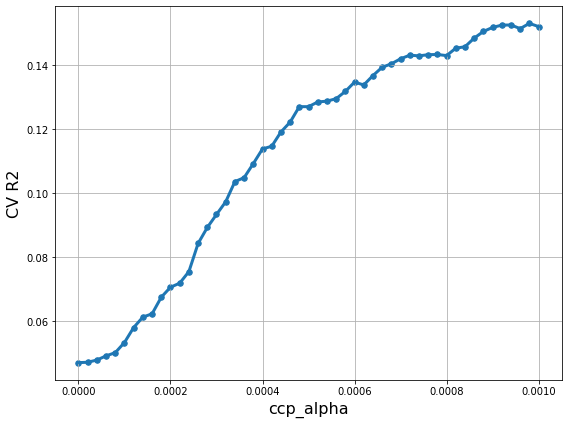

In [27]:
ccp_alpha = dtr_cv.cv_results_['param_ccp_alpha'].data
R2_scores = dtr_cv.cv_results_['mean_test_score']

plt.figure(figsize=(8, 6))
plt.xlabel('ccp_alpha', fontsize=16)
plt.ylabel('CV R2', fontsize=16)
plt.scatter(ccp_alpha, R2_scores, s=30)
plt.plot(ccp_alpha, R2_scores, linewidth=3)
plt.grid(True, which='both')
# plt.xlim([0, 0.00055])
# plt.ylim([0.2, 0.5])

plt.tight_layout()
plt.show()

In [28]:
print('Best ccp_alpha', dtr_cv.best_params_)

Best ccp_alpha {'ccp_alpha': 0.0009800000000000002}


ii) I performed an exhaustive GridSearch using k-fold cross validation with k=5. This means that the data was divided into 5 different groups, then one group was removed and the model was trained on the remaining 4 groups. We calculate the average error or R2 using the removed group as the validation ("test") set, and repeat this process, removing the 4 other groups one at a time. In doing this cross validation, the lower limit for # of observations in each bucket (min_samples_leaf) is 5. The lower limit for # of observations in a bucket before considering a splot (min_samples_split) is 20. I selected the complexity parameter, ccp_alpha, by graphing the cross-validation R2 at different values of alpha between 0 and 0.001. This complexity parameter is the lower bound for added improvement, ie a split must improve the the R2 by ccp_alpha in order to be made. The greatest R2 results when the complexity parameter alpha is 0.00098.

### iii) Model performance (OSR-Square, MAE) of Linear Regression and Tree Regression (CART) on Test Set

In [29]:
# Model Evaluation

#OSR-Square of Linear Regression
print('Linear Regression OSR2:', OSR2(linreg, x_test, y_test, y_train))

#OSR-Square of Regression Tree
print('Cross-validated R2:', round(dtr_cv.best_score_, 5)) #R2 achieved on training data with optimal ccp_alpha 
print('Regression Tree OSR2:', round(OSR2(dtr_cv, x_test_dummies, y_test, y_train), 5))


Linear Regression OSR2: 0.1804151924120022
Cross-validated R2: 0.1531
Regression Tree OSR2: 0.19626


In [30]:
#MAE of Linear Regression
mae_linreg = print('MAE Linear Regression', mean_absolute_error(y_test, linreg.predict(x_test)))

#MAE of Regression Tree
mae_regtree = print('MAE of Regression Tree', mean_absolute_error(y_test, dtr_cv.predict(x_test_dummies)))

MAE Linear Regression 0.6170871129206774
MAE of Regression Tree 0.6007097007757428


The performance of the two models are pretty similar; the linear regression model has a slightly lower OSR2 than that of the regression tree, however the linear regressions's MAE is slightly higher than that of the regression tree.

## Part C Classification

In [31]:
yelp['fourOrAbove'] = pd.Series([1 if stars >= 4 else 0 for stars in yelp['stars']])
yelp_test['fourOrAbove'] = pd.Series([1 if stars >= 4 else 0 for stars in yelp_test['stars']])
yelp_test.head()

,stars,review_count,GoodForKids,Alcohol,BusinessAcceptsCreditCards,WiFi,BikeParking,ByAppointmentOnly,WheelechairAccessible,OutdoorSeating,RestaurantsReservations,DogsAllowed,Caters,fourOrAbove
0,4.5,11,(Missing),(Missing),TRUE,(Missing),(Missing),(Missing),(Missing),(Missing),FALSE,(Missing),(Missing),1
1,4.0,82,TRUE,'none',TRUE,'no',TRUE,(Missing),TRUE,FALSE,FALSE,(Missing),TRUE,1
2,5.0,3,(Missing),(Missing),TRUE,'no',TRUE,TRUE,TRUE,(Missing),(Missing),FALSE,(Missing),1
3,4.0,141,TRUE,'none',TRUE,'no',FALSE,(Missing),TRUE,FALSE,FALSE,(Missing),TRUE,1
4,5.0,222,TRUE,'none',TRUE,'free',TRUE,FALSE,FALSE,FALSE,FALSE,FALSE,TRUE,1


## Part D Build Classification Model
### i) Accuracy, Weighing False Negatives and False Positives Equally
I think the modeling choice to focus on accuracy and weigh false positive and false negatives equally is not reasonable because the restaurant faces a bigger consequence if it's rated less than 4 stars, as people don't want to go to a low-quality restaurant. Therefore they'd lose a lot of business. If a restaurant has a rating that is too high, they'd just get more customers than they deserve. (Then the rating might slowly decrease to the "true" value.) However, one important thing to note in predicting star ratings is that if a restaurant's predicting rating is too high, then they might not make as much of an effort to improve the quality of their restaurant before it's opening.

### ii) Thresholding (Linear Regression and Regression Tree Model)
Predict on test set

In [32]:
linreg_classification = [1 if stars >=4 else 0 for stars in linreg.predict(x_test)]
regtree_classification = [1 if stars >=4 else 0 for stars in dtr_cv.predict(x_test_dummies)]

In [33]:
x_test

,review_count,GoodForKids,Alcohol,BusinessAcceptsCreditCards,WiFi,BikeParking,ByAppointmentOnly,WheelechairAccessible,OutdoorSeating,RestaurantsReservations,DogsAllowed,Caters
0,11,(Missing),(Missing),TRUE,(Missing),(Missing),(Missing),(Missing),(Missing),FALSE,(Missing),(Missing)
1,82,TRUE,'none',TRUE,'no',TRUE,(Missing),TRUE,FALSE,FALSE,(Missing),TRUE
2,3,(Missing),(Missing),TRUE,'no',TRUE,TRUE,TRUE,(Missing),(Missing),FALSE,(Missing)
3,141,TRUE,'none',TRUE,'no',FALSE,(Missing),TRUE,FALSE,FALSE,(Missing),TRUE
4,222,TRUE,'none',TRUE,'free',TRUE,FALSE,FALSE,FALSE,FALSE,FALSE,TRUE
...,...,...,...,...,...,...,...,...,...,...,...,...
2683,33,TRUE,'none',TRUE,'no',TRUE,(Missing),(Missing),FALSE,FALSE,(Missing),TRUE
2684,19,FALSE,'full_bar',TRUE,'no',TRUE,(Missing),(Missing),FALSE,FALSE,(Missing),FALSE
2685,182,TRUE,'none',TRUE,'free',TRUE,(Missing),TRUE,FALSE,FALSE,FALSE,FALSE
2686,4,(Missing),(Missing),(Missing),(Missing),(Missing),(Missing),(Missing),(Missing),(Missing),(Missing),(Missing)


### iii) Logistic Regression Model

In [34]:
model2 = smf.logit(formula = 'fourOrAbove ~ review_count + C(GoodForKids, Treatment(reference = "(Missing)")) + C(Alcohol, Treatment(reference = "(Missing)")) + C(BusinessAcceptsCreditCards, Treatment(reference = "(Missing)")) + C(WiFi, Treatment(reference = "(Missing)")) + C(BikeParking, Treatment(reference = "(Missing)")) + C(ByAppointmentOnly, Treatment(reference = "(Missing)")) + C(WheelechairAccessible, Treatment(reference = "(Missing)")) + C(OutdoorSeating, Treatment(reference = "(Missing)")) + C(RestaurantsReservations, Treatment(reference = "(Missing)")) + C(DogsAllowed, Treatment(reference = "(Missing)")) + C(Caters, Treatment(reference = "(Missing)"))', data=yelp)
logreg = model2.fit()
print(logreg.summary())
logreg.predict(x_test)
logreg_classification = [1 if star >= 0.5 else 0 for star in logreg.predict(x_test)]
# sum(logreg_classification)



Optimization terminated successfully.
         Current function value: 0.608938
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:            fourOrAbove   No. Observations:                 6272
Model:                          Logit   Df Residuals:                     6246
Method:                           MLE   Df Model:                           25
Date:                Fri, 12 Mar 2021   Pseudo R-squ.:                  0.1113
Time:                        18:38:43   Log-Likelihood:                -3819.3
converged:                       True   LL-Null:                       -4297.5
Covariance Type:            nonrobust   LLR p-value:                9.494e-186
                                                                               coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------------------

### iv) Classification Tree Model

In [35]:
grid_values = {'ccp_alpha': np.linspace(0, 0.001, 51)}
from sklearn.tree import DecisionTreeClassifier

dtc = DecisionTreeClassifier(min_samples_leaf=5, min_samples_split=20, random_state=88)
### Note that the line below is important. It ensures that the training data is split into
### five folds randomly. Recall what we've seen in the discussion slides that by default,
### GridSearchCV will split the training data without shuffling. 
cv = KFold(n_splits=5,random_state=1,shuffle=True) 
### by setting random_state as a fixed number, we ensure that each time the GridSearchCV splits data, we get the 
### same split.
dtc_classification_tree = GridSearchCV(dtc, param_grid=grid_values, scoring = 'accuracy', cv=cv, verbose=0)
dtc_classification_tree.fit(x_train_dummies, yelp['fourOrAbove']) # ****TRAINED ON BINARY: 4+ STARS, OR NOT 4+ STARS****

GridSearchCV(cv=KFold(n_splits=5, random_state=1, shuffle=True),
             estimator=DecisionTreeClassifier(min_samples_leaf=5,
                                              min_samples_split=20,
                                              random_state=88),
             param_grid={'ccp_alpha': array([0.0e+00, 2.0e-05, 4.0e-05, 6.0e-05, 8.0e-05, 1.0e-04, 1.2e-04,
       1.4e-04, 1.6e-04, 1.8e-04, 2.0e-04, 2.2e-04, 2.4e-04, 2.6e-04,
       2.8e-04, 3.0e-04, 3.2e-04, 3.4e-04, 3.6e-04, 3.8e-04, 4.0e-04,
       4.2e-04, 4.4e-04, 4.6e-04, 4.8e-04, 5.0e-04, 5.2e-04, 5.4e-04,
       5.6e-04, 5.8e-04, 6.0e-04, 6.2e-04, 6.4e-04, 6.6e-04, 6.8e-04,
       7.0e-04, 7.2e-04, 7.4e-04, 7.6e-04, 7.8e-04, 8.0e-04, 8.2e-04,
       8.4e-04, 8.6e-04, 8.8e-04, 9.0e-04, 9.2e-04, 9.4e-04, 9.6e-04,
       9.8e-04, 1.0e-03])},
             scoring='accuracy')

In [36]:
sum(dtc_classification_tree.predict(x_test_dummies))

738

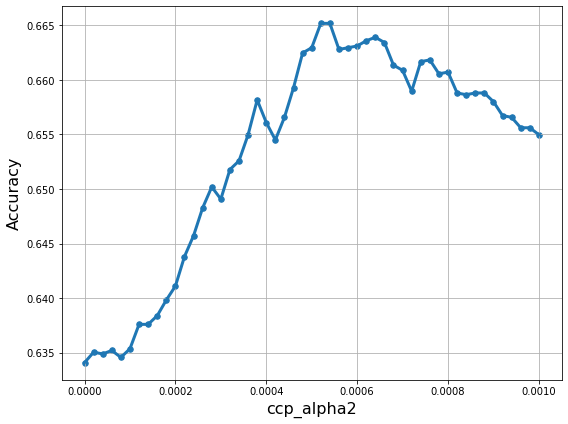

In [37]:
ccp_alpha2 = dtc_classification_tree.cv_results_['param_ccp_alpha'].data
Accuracy_scores = dtc_classification_tree.cv_results_['mean_test_score']

plt.figure(figsize=(8, 6))
plt.xlabel('ccp_alpha2', fontsize=16)
plt.ylabel('Accuracy', fontsize=16)
plt.scatter(ccp_alpha2, Accuracy_scores, s=30)
plt.plot(ccp_alpha2, Accuracy_scores, linewidth=3)
plt.grid(True, which='both')

plt.tight_layout()
plt.show()

In [38]:
print('Best ccp_alpha', dtc_classification_tree.best_params_)

Best ccp_alpha {'ccp_alpha': 0.0005200000000000001}


iv) BECAUSE THIS IS CLASSIFICATION, I USED DecisionTreeClassifier instead of DecisionTreeRegressor. To cross-validate, I performed an exhaustive GridSearch using k-fold cross validation with k=5. This means that the data was divided into 5 different groups, then one group was removed and the model was trained on the remaining 4 groups. We calculate the accuracy using the removed group as the validation ("test") set, and repeat this process, removing the 4 other groups one at a time. 

In doing this cross validation, the lower limit for # of observations in each bucket (min_samples_leaf) is 5. The lower limit for # of observations in a bucket before considering a splot (min_samples_split) is 20. I selected the complexity parameter, ccp_alpha, by graphing the cross-validation accuracy at different values of alpha between 0 and 0.001. This complexity parameter is the lower bound for added improvement, ie a split must improve the the accuracy by ccp_alpha in order to be made. 

The greatest accuracy results when the complexity parameter alpha is 0.00052.

### v) "Vanilla" Bagging of CART Models
set max_features = total number of features, train random forest

In [39]:
from sklearn.ensemble import RandomForestClassifier

rf_vanilla = RandomForestClassifier(max_features= x_train_dummies.shape[1], min_samples_leaf=5, 
                           n_estimators = 500, random_state=88, verbose=2)
# Note: you can change the verbose parameter to control how much training progress is printed.
rf_vanilla.fit(x_train_dummies, yelp['fourOrAbove'])

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


building tree 1 of 500
building tree 2 of 500
building tree 3 of 500
building tree 4 of 500
building tree 5 of 500
building tree 6 of 500
building tree 7 of 500
building tree 8 of 500
building tree 9 of 500
building tree 10 of 500
building tree 11 of 500
building tree 12 of 500
building tree 13 of 500
building tree 14 of 500
building tree 15 of 500
building tree 16 of 500
building tree 17 of 500
building tree 18 of 500
building tree 19 of 500
building tree 20 of 500
building tree 21 of 500
building tree 22 of 500
building tree 23 of 500
building tree 24 of 500
building tree 25 of 500
building tree 26 of 500
building tree 27 of 500
building tree 28 of 500
building tree 29 of 500
building tree 30 of 500
building tree 31 of 500
building tree 32 of 500
building tree 33 of 500
building tree 34 of 500
building tree 35 of 500
building tree 36 of 500
building tree 37 of 500
building tree 38 of 500
building tree 39 of 500
building tree 40 of 500
building tree 41 of 500
building tree 42 of 500
b

building tree 342 of 500
building tree 343 of 500
building tree 344 of 500
building tree 345 of 500
building tree 346 of 500
building tree 347 of 500
building tree 348 of 500
building tree 349 of 500
building tree 350 of 500
building tree 351 of 500
building tree 352 of 500
building tree 353 of 500
building tree 354 of 500
building tree 355 of 500
building tree 356 of 500
building tree 357 of 500
building tree 358 of 500
building tree 359 of 500
building tree 360 of 500
building tree 361 of 500
building tree 362 of 500
building tree 363 of 500
building tree 364 of 500
building tree 365 of 500
building tree 366 of 500
building tree 367 of 500
building tree 368 of 500
building tree 369 of 500
building tree 370 of 500
building tree 371 of 500
building tree 372 of 500
building tree 373 of 500
building tree 374 of 500
building tree 375 of 500
building tree 376 of 500
building tree 377 of 500
building tree 378 of 500
building tree 379 of 500
building tree 380 of 500
building tree 381 of 500


[Parallel(n_jobs=1)]: Done 500 out of 500 | elapsed:    8.4s finished


RandomForestClassifier(max_features=36, min_samples_leaf=5, n_estimators=500,
                       random_state=88, verbose=2)

In [41]:
# rf_vanilla.verbose = False
# print('OSR2:', round(OSR2(rf_vanilla, x_test_dummies, y_test, y_train), 5))

### vi) Random Forest model
Using cross-validation to select the m (max_features)

#### d.vi.1 Define the grid values and perform the Grid Search Cross-Validation (4 min to run)

In [42]:
import time

grid_values = {'max_features': np.linspace(1, x_train_dummies.shape[1], 36, dtype='int32'),
               'min_samples_leaf': [5],
               'n_estimators': [500],
               'random_state': [88]} 

tic = time.time()

rf2 = RandomForestClassifier() 
# Note: here we set verbose=2 to keep track of the progress (the running time) of the cross validation. 
cv = KFold(n_splits=5,random_state=333,shuffle=True) 
rf_cv = GridSearchCV(rf2, param_grid=grid_values, cv=cv,verbose=2)
rf_cv.fit(x_train_dummies, yelp['fourOrAbove'])

toc = time.time()

print('time:', round(toc-tic, 2),'s')

Fitting 5 folds for each of 36 candidates, totalling 180 fits
[CV] END max_features=1, min_samples_leaf=5, n_estimators=500, random_state=88; total time=   1.5s
[CV] END max_features=1, min_samples_leaf=5, n_estimators=500, random_state=88; total time=   1.5s
[CV] END max_features=1, min_samples_leaf=5, n_estimators=500, random_state=88; total time=   1.5s
[CV] END max_features=1, min_samples_leaf=5, n_estimators=500, random_state=88; total time=   1.5s
[CV] END max_features=1, min_samples_leaf=5, n_estimators=500, random_state=88; total time=   1.6s
[CV] END max_features=2, min_samples_leaf=5, n_estimators=500, random_state=88; total time=   1.7s
[CV] END max_features=2, min_samples_leaf=5, n_estimators=500, random_state=88; total time=   1.8s
[CV] END max_features=2, min_samples_leaf=5, n_estimators=500, random_state=88; total time=   1.7s
[CV] END max_features=2, min_samples_leaf=5, n_estimators=500, random_state=88; total time=   1.7s
[CV] END max_features=2, min_samples_leaf=5, n_

[CV] END max_features=17, min_samples_leaf=5, n_estimators=500, random_state=88; total time=   4.3s
[CV] END max_features=17, min_samples_leaf=5, n_estimators=500, random_state=88; total time=   4.1s
[CV] END max_features=17, min_samples_leaf=5, n_estimators=500, random_state=88; total time=   4.3s
[CV] END max_features=18, min_samples_leaf=5, n_estimators=500, random_state=88; total time=   4.4s
[CV] END max_features=18, min_samples_leaf=5, n_estimators=500, random_state=88; total time=   4.2s
[CV] END max_features=18, min_samples_leaf=5, n_estimators=500, random_state=88; total time=   4.2s
[CV] END max_features=18, min_samples_leaf=5, n_estimators=500, random_state=88; total time=   4.2s
[CV] END max_features=18, min_samples_leaf=5, n_estimators=500, random_state=88; total time=   4.4s
[CV] END max_features=19, min_samples_leaf=5, n_estimators=500, random_state=88; total time=   4.5s
[CV] END max_features=19, min_samples_leaf=5, n_estimators=500, random_state=88; total time=   4.5s


[CV] END max_features=33, min_samples_leaf=5, n_estimators=500, random_state=88; total time=   6.5s
[CV] END max_features=34, min_samples_leaf=5, n_estimators=500, random_state=88; total time=   6.7s
[CV] END max_features=34, min_samples_leaf=5, n_estimators=500, random_state=88; total time=   6.8s
[CV] END max_features=34, min_samples_leaf=5, n_estimators=500, random_state=88; total time=   6.9s
[CV] END max_features=34, min_samples_leaf=5, n_estimators=500, random_state=88; total time=   6.5s
[CV] END max_features=34, min_samples_leaf=5, n_estimators=500, random_state=88; total time=   6.6s
[CV] END max_features=35, min_samples_leaf=5, n_estimators=500, random_state=88; total time=   6.8s
[CV] END max_features=35, min_samples_leaf=5, n_estimators=500, random_state=88; total time=   7.0s
[CV] END max_features=35, min_samples_leaf=5, n_estimators=500, random_state=88; total time=   6.8s
[CV] END max_features=35, min_samples_leaf=5, n_estimators=500, random_state=88; total time=   6.8s


####  d.vi.2 Select the best hyperparameter

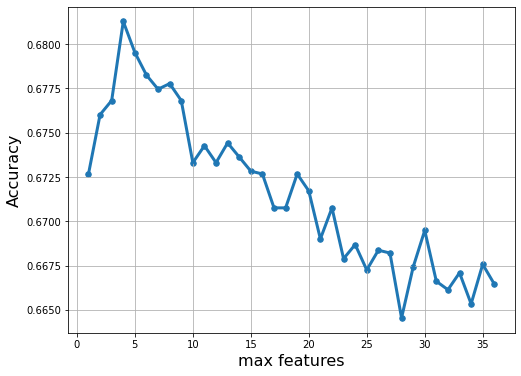

In [43]:
max_features = rf_cv.cv_results_['param_max_features'].data
accuracy_scores = rf_cv.cv_results_['mean_test_score']

plt.figure(figsize=(8, 6))
plt.xlabel('max features', fontsize=16)
plt.ylabel('Accuracy', fontsize=16)
plt.scatter(max_features, accuracy_scores, s=30)
plt.plot(max_features, accuracy_scores, linewidth=3)
plt.grid(True, which='both')
# plt.xlim([1, 19])
# plt.ylim([0.3, 0.6])

In [44]:
print(rf_cv.best_params_)

{'max_features': 4, 'min_samples_leaf': 5, 'n_estimators': 500, 'random_state': 88}


In [45]:
rf_cv.predict(x_test_dummies)

array([0, 1, 1, ..., 1, 0, 0])

I performed an exhaustive GridSearch using k-fold cross validation with k=5. This means that the data was divided into 5 different groups, then one group was removed and the model was trained on the remaining 4 groups. We calculate the accuracy using the removed group as the validation ("test") set, and repeat this process, removing the 4 other groups one at a time. 

In doing this cross validation, the lower limit for # of observations in each bucket (min_samples_leaf) is 5. 
The value of B (n_estimators) was set to 500; this is the number of CART models in a bag.

I selected the value of m, max_features, by looping over all possible integer values from 1 to the number of features, 36 (36 including the dummy variables). Then I graphed the cross-validation accuracy at the different values of m and chose the m that yielded the greatest accuracy.

The greatest accuracy results when the max_features m is 4.

### vii) Comparison Table

In [46]:
from sklearn.metrics import confusion_matrix
y_test_binary = pd.Series([1 if stars >= 4 else 0 for stars in yelp_test['stars']])

#Baseline Model Predicts all 'Stars' as 0
cm_baseline = confusion_matrix(y_test_binary, [0]*y_test.shape[0])
print ("Baseline Confusion Matrix : \n", cm_baseline) 

#Linear Regression w Thresholding ii)
cm_linreg = confusion_matrix(y_test_binary, linreg_classification)
print ("Linear Regression Confusion Matrix : \n", cm_linreg) 

#Regression Tree w Thresholding ii)
cm_regtree = confusion_matrix(y_test_binary, regtree_classification)
print ("Linear Regression Confusion Matrix : \n", cm_regtree) 

#Logistic Regression w Thresholding iii)
cm_logreg = confusion_matrix(y_test_binary, logreg_classification)
print ("Logistic Regression Confusion Matrix : \n", cm_logreg) 

#Classification Tree Model iv)
cm_class_tree = confusion_matrix(y_test_binary, dtc_classification_tree.predict(x_test_dummies))
print ("Classification Tree Confusion Matrix : \n", cm_class_tree)

#"Vanilla" Bagging v)
cm_vanilla = confusion_matrix(y_test_binary, rf_vanilla.predict(x_test_dummies))
print ("Vanilla Bagging Confusion Matrix : \n", cm_vanilla)

#Random Forest Model vi)
cm_rf = confusion_matrix(y_test_binary, rf_cv.predict(x_test_dummies))
print ("Random Forest Confusion Matrix : \n", cm_rf)

Baseline Confusion Matrix : 
 [[1475    0]
 [1213    0]]
Linear Regression Confusion Matrix : 
 [[1412   63]
 [ 981  232]]
Linear Regression Confusion Matrix : 
 [[1417   58]
 [ 986  227]]
Logistic Regression Confusion Matrix : 
 [[1212  263]
 [ 609  604]]
Classification Tree Confusion Matrix : 
 [[1271  204]
 [ 679  534]]
Vanilla Bagging Confusion Matrix : 
 [[1151  324]
 [ 559  654]]
Random Forest Confusion Matrix : 
 [[1227  248]
 [ 579  634]]


In [47]:
def classification_metrics(confusion_matrix):
    accuracy = (confusion_matrix[0,0] + confusion_matrix[1,1]) / np.sum(confusion_matrix[:,:])
    tpr = confusion_matrix[1,1] / (confusion_matrix[1,0] + confusion_matrix[1,1])
    fpr = confusion_matrix[0,1] / (confusion_matrix[0,0] + confusion_matrix[0,1])
    return [accuracy, tpr, fpr]

In [49]:
comparison_data = [classification_metrics(models) for models in [cm_baseline, cm_linreg, cm_regtree, cm_logreg, cm_class_tree, cm_vanilla, cm_rf]] 
comparison_table = pd.DataFrame(data=comparison_data, index=['Baseline Model', 'Linear Regression w Thresholding', 'Regression Tree w Thresholding', 'Logistic Regression w Thresholding', 'Classification Tree Model', 'Vanilla Bagging', 'Random Forest Model'])
comparison_table = comparison_table.rename(columns={0:'Accuracy', 1:'TPR', 2:'FPR'})
comparison_table

,Accuracy,TPR,FPR
Baseline Model,0.548735,0.000000,0.000000
Linear Regression w Thresholding,0.611607,0.191261,0.042712
Regression Tree w Thresholding,0.611607,0.187139,0.039322
Logistic Regression w Thresholding,0.675595,0.497939,0.178305
Classification Tree Model,0.671503,0.440231,0.138305
Vanilla Bagging,0.671503,0.539159,0.219661
Random Forest Model,0.692336,0.522671,0.168136


dvii) The performance of the models is judged by their accuracy, true positive rate, and false positive rate. The results seem reasonable to me as the baseline has the lowest accuracy of the 7 models, and I know that it's TPR and FPR are always 0. It makes sense that the baseline acuraccy is 0.55 because it simply predicts the majority outcome, and 55% percent of restaurants had less than 4 stars.

It also makes sense that the vanilla bagging has a lower accuracy than random forest, because they're essentially the same except the random forest uses cross validation to improve the vanilla bagging's accuracy. I notice that two pairs of models have the same accuracy but different TPR and FPR's; this would be more significant if we weighted the losses unequally.

Overall, it seems that the classification models perform better than the regression models that were thresholded, which makes sense because we're measuring accuracy of a classification problem. Additionally, the more complicated models (with more layers of randomization) have better accuracy.

For this problem, I would recommend the random forest model because it has the highest accuracy with the second highest TPR and a solid FPR (FPR isn't the best but isn't terrible either).

### Part E. "How to Guide"

15 points) Suppose that you are a data scientist working for Yelp and you have been taskedwith  producing  a  “how  to  guide”  for  Las  Vegas  restaurants,  which  is  supposed  to  includetips for actions restaurants may take to achieve a high star rating.  Use the provided datato construct a list of three such tips.  Each of your tips should be justified by the data, andeach justification should be understandable by a restaurant owner who may not know muchabout  machine  learning.   This  question  is  purposefully  open  ended,  and  you  may  considerusing modeling techniques and/or visualizations to come up with and justify your three tips.

#### 1. Have a lot of reviews
My first tip is to gather a lot of reviews, as this is very important in predicting a high star rating. In the random forest model, looking at feature importance—which is basically a ranking of how important each variable's contibution to the model is—shows that review count is nearly 20 times as important as the next most important variable. To confirm that there's a positive relationship, we look at the logistic regression model, which gives review_count a coefficient of 0.0006 with p-value 0. Even though the coefficient is small, since the p-value is zero, this means we are very confident in the relationship. Having a large number of reviews can be achieved by buying ads on yelp to promote the restaurant, or by promotions such as giving customers a coupon for writing a review.
See Table 1 and 2 for these data.

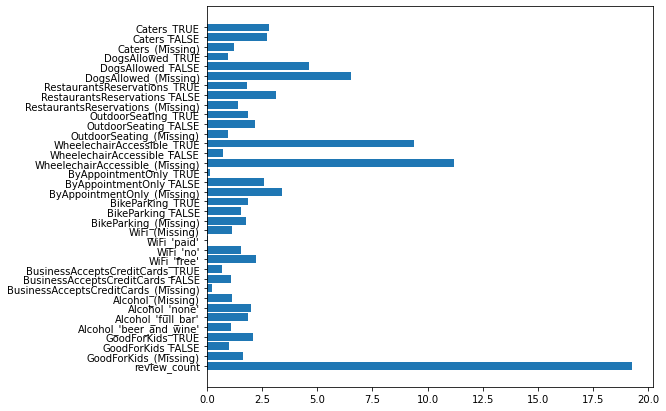

In [50]:
# Table 1
plt.figure(figsize=(8,7))
plt.barh(x_train_dummies.columns, 100*rf_cv.best_estimator_.feature_importances_)
plt.show()

In [51]:
# Table 2
logreg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:            fourOrAbove   No. Observations:                 6272
Model:                          Logit   Df Residuals:                     6246
Method:                           MLE   Df Model:                           25
Date:                Fri, 12 Mar 2021   Pseudo R-squ.:                  0.1113
Time:                        19:01:05   Log-Likelihood:                -3819.3
converged:                       True   LL-Null:                       -4297.5
Covariance Type:            nonrobust   LLR p-value:                9.494e-186
============================================================================================================================================
                                                                               coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------------------------------------
Intercept                                                                   -0.4090      0.104     -3.947      0.000      -0.612      -0.206
C(GoodForKids, Treatment(reference="(Missing)"))[T.FALSE]                    0.1374      0.128      1.071      0.284      -0.114       0.389
C(GoodForKids, Treatment(reference="(Missing)"))[T.TRUE]                    -0.2631      0.099     -2.665      0.008      -0.457      -0.070
C(Alcohol, Treatment(reference="(Missing)"))[T.'beer_and_wine']              0.0845      0.132      0.642      0.521      -0.174       0.343
C(Alcohol, Treatment(reference="(Missing)"))[T.'full_bar']                  -0.1999      0.124     -1.611      0.107      -0.443       0.043
C(Alcohol, Treatment(reference="(Missing)"))[T.'none']                       0.2606      0.111      2.357      0.018       0.044       0.477
C(BusinessAcceptsCreditCards, Treatment(reference="(Missing)"))[T.FALSE]     1.3953      0.258      5.399      0.000       0.889       1.902
C(BusinessAcceptsCreditCards, Treatment(reference="(Missing)"))[T.TRUE]      0.0506      0.123      0.411      0.681      -0.191       0.292
C(WiFi, Treatment(reference="(Missing)"))[T.'free']                          0.1685      0.096      1.751      0.080      -0.020       0.357
C(WiFi, Treatment(reference="(Missing)"))[T.'no']                            0.1303      0.094      1.388      0.165      -0.054       0.314
C(WiFi, Treatment(reference="(Missing)"))[T.'paid']                         -0.4987      0.345     -1.447      0.148      -1.174       0.177
C(BikeParking, Treatment(reference="(Missing)"))[T.FALSE]                   -0.3420      0.091     -3.748      0.000      -0.521      -0.163
C(BikeParking, Treatment(reference="(Missing)"))[T.TRUE]                    -0.1881      0.081     -2.335      0.020      -0.346      -0.030
C(ByAppointmentOnly, Treatment(reference="(Missing)"))[T.FALSE]              0.4978      0.096      5.164      0.000       0.309       0.687
C(ByAppointmentOnly, Treatment(reference="(Missing)"))[T.TRUE]               0.4966      0.319      1.556      0.120      -0.129       1.122
C(WheelechairAccessible, Treatment(reference="(Missing)"))[T.FALSE]          1.7634      0.299      5.894      0.000       1.177       2.350
C(WheelechairAccessible, Treatment(reference="(Missing)"))[T.TRUE]           1.0044      0.076     13.218      0.000       0.855       1.153
C(OutdoorSeating, Treatment(reference="(Missing)"))[T.FALSE]                -0.1398      0.110     -1.269      0.204      -0.356       0.076
C(OutdoorSeating, Treatment(reference="(Missing)"))[T.TRUE]                  0.0806      0.117      0.688      0.491      -0.149       0.310
C(RestaurantsReservations, Treatment(reference="(Missing)"))[T.FALSE]       -0.4166      0.113     -3.679      0.000      -0.639      -0.19

#### 2. Offer Catering
My linear regression and logistic regression analysis shows that offering catering has a strong effect on achieving a high star rating. The variable representing a restaurant that offers catering is positive, while not offering catering has a negative coefficient. (Both of these variables have p-values close to 0, which means that our analysis is statistically significant.) Thus our model shows that on average, offering catering will increase the expected star rating by 0.1059, and not offering catering decreases the rating by 0.1362 stars.
See Table 3 below for this data.

In [52]:
# Table 3
linreg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  stars   R-squared:                       0.161
Model:                            OLS   Adj. R-squared:                  0.157
Method:                 Least Squares   F-statistic:                     47.80
Date:                Fri, 12 Mar 2021   Prob (F-statistic):          3.10e-215
Time:                        19:01:05   Log-Likelihood:                -7317.5
No. Observations:                6272   AIC:                         1.469e+04
Df Residuals:                    6246   BIC:                         1.486e+04
Df Model:                          25                                         
Covariance Type:            nonrobust                                         
============================================================================================================================================
                                                                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------------------------------------
Intercept                                                                    3.3386      0.039     85.256      0.000       3.262       3.415
C(GoodForKids, Treatment(reference="(Missing)"))[T.FALSE]                   -0.0283      0.046     -0.614      0.540      -0.119       0.062
C(GoodForKids, Treatment(reference="(Missing)"))[T.TRUE]                    -0.1240      0.036     -3.487      0.000      -0.194      -0.054
C(Alcohol, Treatment(reference="(Missing)"))[T.'beer_and_wine']              0.1798      0.047      3.853      0.000       0.088       0.271
C(Alcohol, Treatment(reference="(Missing)"))[T.'full_bar']                   0.0713      0.044      1.632      0.103      -0.014       0.157
C(Alcohol, Treatment(reference="(Missing)"))[T.'none']                       0.0901      0.039      2.300      0.021       0.013       0.167
C(BusinessAcceptsCreditCards, Treatment(reference="(Missing)"))[T.FALSE]     0.6656      0.091      7.352      0.000       0.488       0.843
C(BusinessAcceptsCreditCards, Treatment(reference="(Missing)"))[T.TRUE]      0.0968      0.046      2.095      0.036       0.006       0.187
C(WiFi, Treatment(reference="(Missing)"))[T.'free']                          0.0524      0.035      1.518      0.129      -0.015       0.120
C(WiFi, Treatment(reference="(Missing)"))[T.'no']                            0.0688      0.034      2.051      0.040       0.003       0.135
C(WiFi, Treatment(reference="(Missing)"))[T.'paid']                         -0.2286      0.109     -2.090      0.037      -0.443      -0.014
C(BikeParking, Treatment(reference="(Missing)"))[T.FALSE]                   -0.1346      0.032     -4.184      0.000      -0.198      -0.072
C(BikeParking, Treatment(reference="(Missing)"))[T.TRUE]                    -0.0648      0.029     -2.236      0.025      -0.122      -0.008
C(ByAppointmentOnly, Treatment(reference="(Missing)"))[T.FALSE]              0.1476      0.034      4.361      0.000       0.081       0.214
C(ByAppointmentOnly, Treatment(reference="(Missing)"))[T.TRUE]               0.2671      0.107      2.501      0.012       0.058       0.476
C(WheelechairAccessible, Treatment(reference="(Missing)"))[T.FALSE]          0.7294      0.090      8.116      0.000       0.553       0.906
C(WheelechairAccessible, Treatment(reference="(Missing)"))[T.TRUE]           0.3599      0.028     12.927      0.000       0.305       0.415
C(OutdoorSeating, Treatment(reference="(Missing)"))[T.FALSE]                -0.0332      0.040     -0.833      0.405      -0.111       0.045
C(OutdoorSeating, Treatment(reference="(Missing)"))[T.TRUE]                  0.0859      0.042      2.021      0.043      

#### 3. Either Offer WiFi for Free, or Don't Offer it All
Table 3 above shows that offering paid wifi is predicted to decrease the star rating by 0.2286, which is an important difference compared to the other two options about wifi. On average, offering free wifi is predicted to increase the star rating by 0.0524, and not offering wifi is predicted to increase the rating by 0.0688. Thus, in order to avoid actively hurting a restaurants' rating, Either Offer WiFi for Free, or Don't Offer it All. (This recommendation is also supported in an additional model, Logistic regression shown in Table 2). This is a reasosnable recommendation because customers may become annoyed when they realize that they have to pay for Wifi, as they're already paying for food and tipping. 